In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

# Read the CSV and Perform Basic Data Cleaning

DataSource https://www.kaggle.com/nasa/kepler-exoplanet-search-results

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# features are all the df columns but target variable columns
features = df.drop("koi_disposition", axis=1)
#Use `koi_disposition` for the y values
target = df["koi_disposition"]
print(features.shape, target.shape)

(6991, 40) (6991,)


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_fpflag_nt      6991 non-null   int64  
 1   koi_fpflag_ss      6991 non-null   int64  
 2   koi_fpflag_co      6991 non-null   int64  
 3   koi_fpflag_ec      6991 non-null   int64  
 4   koi_period         6991 non-null   float64
 5   koi_period_err1    6991 non-null   float64
 6   koi_period_err2    6991 non-null   float64
 7   koi_time0bk        6991 non-null   float64
 8   koi_time0bk_err1   6991 non-null   float64
 9   koi_time0bk_err2   6991 non-null   float64
 10  koi_impact         6991 non-null   float64
 11  koi_impact_err1    6991 non-null   float64
 12  koi_impact_err2    6991 non-null   float64
 13  koi_duration       6991 non-null   float64
 14  koi_duration_err1  6991 non-null   float64
 15  koi_duration_err2  6991 non-null   float64
 16  koi_depth          6991 

In [5]:
target.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
# split the data to train and test values
X_train, X_test, y_train, y_test = train_test_split(features, target,stratify=target)

In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5264,0,0,0,0,458.167540,0.031530,-0.031530,462.252200,0.050400,-0.050400,...,-162,4.566,0.029,-0.263,0.816,0.324,-0.062,294.96246,46.676289,15.983
5230,1,0,0,0,19.795973,0.000131,-0.000131,135.936670,0.005850,-0.005850,...,-259,4.043,0.231,-0.168,1.876,0.563,-0.563,299.44345,43.449886,9.816
5054,0,0,0,0,10.209027,0.000188,-0.000188,140.680500,0.018500,-0.018500,...,-135,4.196,0.115,-0.126,1.524,0.278,-0.228,289.77325,40.800720,13.310
2807,0,0,0,0,9.478508,0.000053,-0.000053,140.165260,0.004300,-0.004300,...,-217,4.428,0.054,-0.202,1.076,0.335,-0.112,286.97128,44.708302,14.456
895,0,1,0,0,9.771463,0.000003,-0.000003,135.584899,0.000219,-0.000219,...,-159,4.551,0.042,-0.168,0.853,0.212,-0.076,286.14938,49.867512,14.245


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train_scaled, y_train)
# model.predict(X_train_scaled)
model.score(X_test_scaled, y_test)#pred model.predict()

0.9016018306636155

In [10]:
features.columns

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [11]:
model.feature_importances_

array([0.09786989, 0.06572825, 0.10838073, 0.04008364, 0.02103155,
       0.01867885, 0.01785674, 0.01487039, 0.02112096, 0.02190094,
       0.0187569 , 0.01147037, 0.01189176, 0.0237105 , 0.02695577,
       0.03395148, 0.02056032, 0.0138128 , 0.01440954, 0.05205972,
       0.03357569, 0.02938115, 0.01530365, 0.01552977, 0.01440011,
       0.01384315, 0.06032105, 0.00372262, 0.00928283, 0.02897595,
       0.02725455, 0.00900573, 0.00916814, 0.01056801, 0.00914985,
       0.01058761, 0.00898246, 0.01317353, 0.01135321, 0.01131984])

In [12]:
sorted(zip(model.feature_importances_, features), reverse=True)

[(0.10838073284799021, 'koi_fpflag_co'),
 (0.09786989445147286, 'koi_fpflag_nt'),
 (0.06572824988858372, 'koi_fpflag_ss'),
 (0.06032104728369427, 'koi_model_snr'),
 (0.05205971688444264, 'koi_prad'),
 (0.04008363934039525, 'koi_fpflag_ec'),
 (0.03395148352945716, 'koi_duration_err2'),
 (0.033575686311734916, 'koi_prad_err1'),
 (0.029381154344927208, 'koi_prad_err2'),
 (0.02897595010034064, 'koi_steff_err1'),
 (0.027254547946186192, 'koi_steff_err2'),
 (0.026955773872479077, 'koi_duration_err1'),
 (0.02371050255624972, 'koi_duration'),
 (0.021900936156186775, 'koi_time0bk_err2'),
 (0.021120959443998416, 'koi_time0bk_err1'),
 (0.02103154596208847, 'koi_period'),
 (0.020560320257638237, 'koi_depth'),
 (0.01875690138895259, 'koi_impact'),
 (0.018678848980722283, 'koi_period_err1'),
 (0.017856743244131036, 'koi_period_err2'),
 (0.015529771374124018, 'koi_insol'),
 (0.015303646093963941, 'koi_teq'),
 (0.014870389245398916, 'koi_time0bk'),
 (0.01440953938025959, 'koi_depth_err2'),
 (0.0144001

In [13]:
print(f"Training Data Score (scaled): {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score (scaled): {model.score(X_test_scaled, y_test)}")

Training Data Score (scaled): 1.0
Testing Data Score (scaled): 0.9016018306636155


In [14]:
X_test_scaled

array([[1.        , 0.        , 0.        , ..., 0.51020138, 0.04513236,
        0.3880486 ],
       [0.        , 0.        , 0.        , ..., 0.50667195, 0.68100902,
        0.71724936],
       [0.        , 1.        , 0.        , ..., 0.76013095, 0.70314157,
        0.57682453],
       ...,
       [0.        , 0.        , 0.        , ..., 0.58698321, 0.07084818,
        0.4871477 ],
       [0.        , 0.        , 0.        , ..., 0.23787314, 0.61456836,
        0.72815935],
       [1.        , 0.        , 0.        , ..., 0.80803881, 0.6390738 ,
        0.41929085]])

In [15]:
ypred=model.predict(X_test_scaled)
ypred

array(['FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [16]:
y_test.values

array(['FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [17]:
res=pd.DataFrame([ypred,y_test.values]).T
res.columns=['Predict','GroundTruth']
res

,Predict,GroundTruth
0,FALSE POSITIVE,FALSE POSITIVE
1,CONFIRMED,CONFIRMED
2,FALSE POSITIVE,FALSE POSITIVE
3,CANDIDATE,CANDIDATE
4,CANDIDATE,CANDIDATE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,FALSE POSITIVE,CONFIRMED
1745,CONFIRMED,CONFIRMED
1746,CONFIRMED,CANDIDATE


In [18]:
len(res[res['Predict']==res['GroundTruth']])/1748

0.9016018306636155

In [19]:
res1=res[res['GroundTruth']=='FALSE POSITIVE']
res1

,Predict,GroundTruth
0,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
6,FALSE POSITIVE,FALSE POSITIVE
7,FALSE POSITIVE,FALSE POSITIVE
9,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1729,FALSE POSITIVE,FALSE POSITIVE
1730,FALSE POSITIVE,FALSE POSITIVE
1733,FALSE POSITIVE,FALSE POSITIVE
1737,FALSE POSITIVE,FALSE POSITIVE


In [20]:
len(res1[res1['Predict']==res1['GroundTruth']])/876

1.0

In [21]:
from sklearn.metrics import classification_report
print('precise of prediction:',model.score(X_test_scaled,y_test))
y_pred=model.predict(X_test_scaled)
pd.DataFrame(classification_report(y_test,y_pred,target_names=['CANDIDATE', 'CONFIRMED' , 'FALSE POSITIVE'],output_dict=True))

precise of prediction: 0.9016018306636155


,CANDIDATE,CONFIRMED,FALSE POSITIVE,accuracy,macro avg,weighted avg
precision,0.847826,0.804979,0.975501,0.901602,0.876102,0.900779
recall,0.739336,0.862222,1.000000,0.901602,0.867186,0.901602
f1-score,0.789873,0.832618,0.987599,0.901602,0.870030,0.899966
support,422.000000,450.000000,876.000000,0.901602,1748.000000,1748.000000


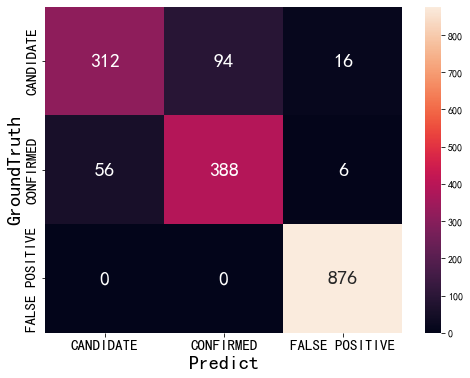

In [22]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm,annot=True,fmt='g',xticklabels=['CANDIDATE', 'CONFIRMED' , 'FALSE POSITIVE'],yticklabels=['CANDIDATE', 'CONFIRMED' , 'FALSE POSITIVE'],annot_kws={"fontsize":20})
ax.set_xlabel('Predict',size=20) 
ax.set_ylabel('GroundTruth',size=20) 
plt.xticks(size=15)
plt.yticks(size=15)
plt.gcf().set_size_inches(8, 6)

# Hyperparameter Tuning
Use `GridSearchCV` to tune the model's parameters

In [23]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV 
# different params for testing in search
# param_grid = {'n_estimators':[50,100,150,200,250,300],'max_depth':[10,50,100]} 
param_grid = {'n_estimators':[50,100,150],'max_depth':[10,50,100]} # 

rf_grid = GridSearchCV(model, param_grid, verbose=3)

In [24]:
rf_grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [25]:
# Train the model with GridSearch

rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.892 total time=   1.0s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.886 total time=   0.8s
[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.881 total time=   0.7s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.891 total time=   0.7s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.876 total time=   0.9s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.896 total time=   1.4s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.888 total time=   1.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.886 total time=   1.2s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.894 total time=   1.6s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.874 total time=   1.1s
[CV 1/5] END ....max_depth=10, n_estimators=150;, score=0.899 total time=   1.8s
[CV 2/5] END ....max_depth=10, n_estimators=150;,

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [10, 50, 100],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [26]:
print("Best Model:",rf_grid.best_estimator_)# model=rf_grid.best_estimator_
print("Best Score:",rf_grid.best_score_)
print("Best Parameters:",rf_grid.best_params_)

Best Model: RandomForestClassifier(max_depth=100, n_estimators=150)
Best Score: 0.8918548381228215
Best Parameters: {'max_depth': 100, 'n_estimators': 150}


# Save the Model

In [41]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'bestmodel.sav'
joblib.dump(model,'bestmodel.sav')
joblib.load('bestmodel.sav')

RandomForestClassifier(n_estimators=200)

### Compare Models

In [28]:
from sklearn import svm
model = svm.SVC()
model = model.fit(X_train_scaled, y_train)
# model.predict(X_train_scaled)
model.score(X_test_scaled, y_test)#pred model.predict()

0.8386727688787186

In [29]:
from sklearn.metrics import classification_report
print('precise of prediction:',model.score(X_test_scaled,y_test))
y_pred=model.predict(X_test_scaled)
svm_report=pd.DataFrame(classification_report(y_test,y_pred,target_names=['CANDIDATE', 'CONFIRMED' , 'FALSE POSITIVE'],output_dict=True))
svm_report

precise of prediction: 0.8386727688787186


,CANDIDATE,CONFIRMED,FALSE POSITIVE,accuracy,macro avg,weighted avg
precision,0.812500,0.639159,0.984270,0.838673,0.811976,0.853957
recall,0.462085,0.877778,1.000000,0.838673,0.779954,0.838673
f1-score,0.589124,0.739700,0.992072,0.838673,0.773632,0.829823
support,422.000000,450.000000,876.000000,0.838673,1748.000000,1748.000000


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)#pred model.predict()

0.9050343249427918

In [31]:
from sklearn.metrics import classification_report
print('precise of prediction:',model.score(X_test_scaled,y_test))
y_pred=model.predict(X_test_scaled)
rf_report=pd.DataFrame(classification_report(y_test,y_pred,target_names=['CANDIDATE', 'CONFIRMED' , 'FALSE POSITIVE'],output_dict=True))
rf_report

precise of prediction: 0.9050343249427918


,CANDIDATE,CONFIRMED,FALSE POSITIVE,accuracy,macro avg,weighted avg
precision,0.846966,0.815678,0.976589,0.905034,0.879744,0.903871
recall,0.760664,0.855556,1.000000,0.905034,0.872073,0.905034
f1-score,0.801498,0.835141,0.988156,0.905034,0.874932,0.903701
support,422.000000,450.000000,876.000000,0.905034,1748.000000,1748.000000


In [32]:
compare_res=pd.DataFrame([rf_report.T['precision'],svm_report.T['precision']]).T
compare_res.columns=['RandomForest','SVM']
compare_res

,RandomForest,SVM
CANDIDATE,0.846966,0.812500
CONFIRMED,0.815678,0.639159
FALSE POSITIVE,0.976589,0.984270
accuracy,0.905034,0.838673
macro avg,0.879744,0.811976
weighted avg,0.903871,0.853957
